# Data Exploration

[Documentation for column values](http://www.nyc.gov/html/gbee/downloads/pdf/2016_nyc_benchmarking_data_disclosure_definitions.pdf).

This exploratory notebook is for rapid investigation of the data. As such I concentrate more on looking at the data, summary statistics, and quick visualizations rather than a finished product. 

Primarily, we are interested in the Energy Star Score, and possibly trying to predict this value. However, there is one large issue with the Energy Star Score: it is based on self-reported energy usage.

In [0]:
# Pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# No warnings about setting value on copy of slice
pd.options.mode.chained_assignment = None

# Matplotlib and seaborn for visualization
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.pylabtools import figsize

import seaborn as sns

pd.set_option('display.max_columns', 60)

# Imputing missing values
from sklearn.preprocessing import Imputer

# Machine Learning Models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

# Evaluating Models
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, mean_absolute_error

import itertools

## Read in data and examine

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/WillKoehrsen/Data-Analysis/master/data_science_hw/Energy_and_Water_Data_Disclosure_for_Local_Law_84_2017__Data_for_Calendar_Year_2016_.csv')
data.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
0,1,13286,201/205,13286,201/205,1013160001,1013160001,1037549,201/205 East 42nd st.,Not Available,10017,675,3 AVENUE,Manhattan,289356.0,Office,Office,Office,293447,Not Available,Not Available,Not Available,Not Available,1963,2,100,Whole Building,Not Available,Not Available,305.6,303.1,37.8,Not Available,614.2,Not Available,Not Available,Not Available,Not Available,Not Available,5.15506751E7,Not Available,Not Available,38139374.2,1.10827705E7,6962.2,0,6962.2,762051,Not Available,Not Available,619.4,05/01/2017 05:32:03 PM,No,In Compliance,40.750791,-73.973963,6.0,4.0,88.0,Turtle Bay-East Midtown ...
1,2,28400,NYP Columbia (West Campus),28400,NYP Columbia (West Campus),1021380040,1-02138-0040,1084198; 1084387;1084385; 1084386; 1084388; 10...,622 168th Street,Not Available,10032,180,FT WASHINGTON AVENUE,Manhattan,3693539.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),3889181,Not Available,Not Available,Not Available,Not Available,1969,12,100,Whole Building,Whole Building,55,229.8,228.8,24.8,2.4,401.1,Not Available,1.96248472E7,Not Available,Not Available,Not Available,-3.914148026E8,933073441,9330734.4,332365924,9.62613121E7,55870.4,51016.4,4854.1,3889181,Not Available,Not Available,404.3,04/27/2017 11:23:27 AM,No,In Compliance,40.841402,-73.942568,12.0,10.0,251.0,Washington Heights South ...
2,3,4778226,MSCHoNY North,28400,NYP Columbia (West Campus),1021380030,1-02138-0030,1063380,3975 Broadway,Not Available,10032,3975,BROADWAY,Manhattan,152765.0,Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),Hospital (General Medical & Surgical),231342,Not Available,Not Available,Not Available,Not Available,1924,1,100,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,Not Available,0,0,0,231342,Not Available,Not Available,Not Available,04/27/2017 11:23:27 AM,No,In Compliance,40.840427,-73.940249,12.0,10.0,251.0,Washington Heights South ...
3,4,4778267,Herbert Irving Pavilion & Millstein Hospital,28400,NYP Columbia (West Campus),1021390001,1-02139-0001,1087281; 1076746,161 Fort Washington Ave,177 Fort Washington Ave,10032,161,FT WASHINGTON AVENUE,Manhattan,891040.0,Hos

In [3]:
data.shape

(11746, 60)

In [4]:
data.describe()

,Order,Property Id,DOF Gross Floor Area,Year Built,Number of Buildings - Self-reported,Occupancy,Property GFA - Self-Reported (ft²),Latitude,Longitude,Community Board,Council District,Census Tract
count,11746.000000,1.174600e+04,1.162800e+04,11746.000000,11746.000000,11746.000000,1.174600e+04,9483.000000,9483.000000,9483.000000,9483.000000,9483.000000
mean,7185.759578,3.642958e+06,1.732695e+05,1948.738379,1.289971,98.762557,1.673739e+05,40.754379,-73.957057,7.140673,15.771275,4977.596647
std,4323.859984,1.049070e+06,3.367055e+05,30.576386,4.017484,7.501603,3.189238e+05,0.080120,0.046337,3.954129,15.674375,13520.422990
min,1.000000,7.365000e+03,5.002800e+04,1600.000000,0.000000,0.000000,0.000000e+00,40.516065,-74.243582,1.000000,1.000000,1.000000
25%,3428.250000,2.747222e+06,6.524000e+04,1927.000000,1.000000,100.000000,6.699400e+04,40.707226,-73.984662,4.000000,4.000000,100.000000
50%,6986.500000,3.236404e+06,9.313850e+04,1941.000000,1.000000,100.000000,9.408000e+04,40.759130,-73.962810,7.000000,9.000000,201.000000
75%,11054.500000,4.409092e+06,1.596140e+05,1966.000000,1.000000,100.000000,1.584140e+05,40.817623,-73.932443,9.000000,33.000000,531.500000
max,14993.000000,5.991312e+06,1.354011e+07,2019.000000,161.000000,100.000000,1.421712e+07,40.912869,-73.715543,56.000000,51.000000,155101.000000


### Column Types

In [5]:
data.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

Why is `ENERGY STAR Score` encoded as an object? Given that this is our primary area of focus, it seems more helpful to have it as a numeric.

Some of the columns that contain numeric values like `ENERGY STAR Score` are coded as `object` data types because missing values are recorded as 'Not Available'. To solve this issue, we can replace the 'Not Available' string with nan and convert the columns to floats.

### Convert Object Columns to Float

In [0]:
data = data.replace({'Not Available': np.nan})

In [0]:
# Iterate through the columns
for col in list(data.columns):
    # Select columns that should be numeric
    if ('ft²' in col or 'kBtu' in col or 'Metric Tons CO2e' in col or 'kWh' in 
        col or 'therms' in col or 'gal' in col or 'Score' in col):
        # Convert the data type to float
        data[col] = data[col].astype(float)

In [8]:
# Look at converted data types
data.dtypes

Order                                                           int64
Property Id                                                     int64
Property Name                                                  object
Parent Property Id                                             object
Parent Property Name                                           object
BBL - 10 digits                                                object
NYC Borough, Block and Lot (BBL) self-reported                 object
NYC Building Identification Number (BIN)                       object
Address 1 (self-reported)                                      object
Address 2                                                      object
Postal Code                                                    object
Street Number                                                  object
Street Name                                                    object
Borough                                                        object
DOF Gross Floor Area

The data types now look to be correct. We will need to fill in the missing values for a machine learning algorithm.

# Look at Percentage of Missing Values in Each Column

Using a simple function, we can examine the percentage of missing (nan) values in each column. Missing values will be an issue for machine learning methods, so we will have to find a smart way to fill in the values.

In [0]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns

In [10]:
missing_values_table(data)

Your selected dataframe has 60 columns.
There are 46 columns that have missing values.


,Missing Values,% of Total Values
Fuel Oil #1 Use (kBtu),11737,99.9
Diesel #2 Use (kBtu),11730,99.9
Address 2,11539,98.2
Fuel Oil #5 & 6 Use (kBtu),11152,94.9
District Steam Use (kBtu),10810,92.0
Fuel Oil #4 Use (kBtu),10425,88.8
3rd Largest Property Use Type - Gross Floor Area (ft²),10262,87.4
3rd Largest Property Use Type,10262,87.4
Fuel Oil #2 Use (kBtu),9165,78.0
2nd Largest Property Use Type,8005,68.2


Now that the data types have been corrected, we can start to look for correlations and patterns within the data. The primary area of focus is the energy star score, so we will concentrate on looking for trends in that variable.

## Exploratory Plots

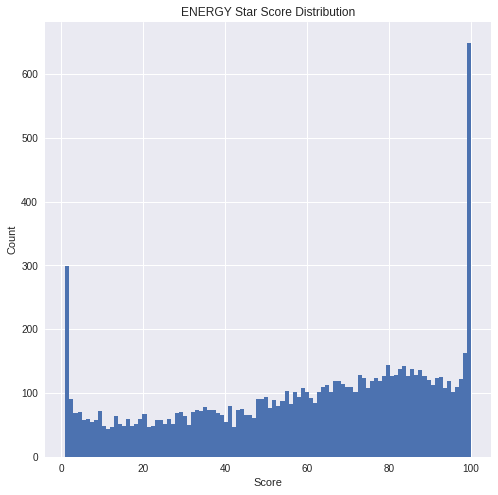

In [11]:
figsize(8, 8)
plt.hist(data['ENERGY STAR Score'].dropna(), bins = 100);
plt.xlabel('Score'); plt.ylabel('Count'); plt.title('ENERGY Star Score Distribution');

In [12]:
data['ENERGY STAR Score'].value_counts().sort_values(ascending=False)

100.0    649
1.0      299
99.0     162
80.0     144
84.0     142
83.0     138
86.0     138
88.0     136
73.0     128
82.0     128
87.0     128
89.0     127
81.0     126
85.0     126
79.0     126
93.0     125
74.0     124
92.0     124
77.0     123
98.0     122
90.0     120
78.0     119
67.0     119
95.0     119
68.0     118
76.0     118
69.0     114
65.0     112
91.0     112
64.0     110
        ... 
20.0      67
46.0      66
39.0      66
45.0      66
13.0      64
30.0      64
47.0      61
19.0      60
26.0      60
6.0       59
16.0      59
24.0      58
23.0      58
5.0       57
8.0       57
7.0       54
40.0      54
18.0      52
25.0      52
27.0      51
14.0      51
31.0      50
22.0      49
10.0      48
17.0      48
15.0      48
42.0      47
12.0      47
21.0      46
11.0      44
Name: ENERGY STAR Score, Length: 100, dtype: int64

This is interesting. There are two modes in the data, one at 1 and another at 100. This seems like something to follow up on.
Is there some shared characteristic among buildings that have a 1 or 100? The ENERGY STAR Score is a percentile score, so it seems unreasonable that so many buildings are clustered at the two extremes.

Given that Energy Star Score is based on self-reported energy usage, it might not be that good of a measure. Let's take a look at another value often used for characterizing the efficiency of a building, the Energy Use Intensity which attempts to normalize the energy usage of a building by the size of a building.

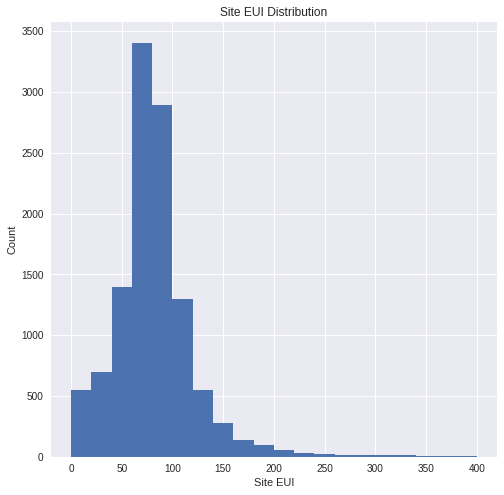

In [13]:
plt.hist(data['Site EUI (kBtu/ft²)'].dropna(), range = (0, 400), bins = 20);
plt.xlabel('Site EUI'); plt.ylabel('Count'); plt.title('Site EUI Distribution');

This plot is more normally distributed with no obvious skew. The Site EUI is probably a better measure of individual building energy performance than the Energy Star Score. 

## Correlations with Energy Star Score

Let's take a look at the Pearson Correlation Coefficient between all the numerical columns and the Energy Star Score. This measures the linear relationship between two variables, and it might shed some light on what features are related to the Energy Star Score.

In [14]:
data.corr()['ENERGY STAR Score'].sort_values()

Fuel Oil #1 Use (kBtu)                                       -0.793589
Fuel Oil #4 Use (kBtu)                                       -0.217676
Fuel Oil #5 & 6 Use (kBtu)                                   -0.192863
Diesel #2 Use (kBtu)                                         -0.171081
Fuel Oil #2 Use (kBtu)                                       -0.144715
Year Built                                                   -0.118181
District Steam Use (kBtu)                                    -0.116806
Weather Normalized Site Electricity Intensity (kWh/ft²)      -0.067762
Electricity Use - Grid Purchase (kBtu)                       -0.066330
Weather Normalized Site Electricity (kWh)                    -0.065789
Total GHG Emissions (Metric Tons CO2e)                       -0.047934
Property Id                                                  -0.047020
Latitude                                                     -0.044262
Source EUI (kBtu/ft²)                                        -0.042873
Weathe

The most significant correlations (in absolute magnitude) are between Fuel Oil Use and Energy Star Score. This makes sense: the more fuel oil a building uses, the lower the Energy Star Score. There are no significant positive linear correlations.


The issue with using Fuel Oil Use is that this column contains 99.9% missing values. Therefore, it will not be very useful in training a model because of the limited information. 

## Correlations with Site EUI

In [15]:
data.corr()['Weather Normalized Site EUI (kBtu/ft²)'].sort_values()

ENERGY STAR Score                                            -0.035227
Occupancy                                                    -0.013070
Latitude                                                     -0.009111
Community Board                                              -0.009037
Order                                                        -0.000599
Number of Buildings - Self-reported                          -0.000455
Water Use (All Water Sources) (kgal)                         -0.000248
Water Intensity (All Water Sources) (gal/ft²)                 0.000304
Largest Property Use Type - Gross Floor Area (ft²)            0.009192
Property Id                                                   0.009993
Property GFA - Self-Reported (ft²)                            0.010757
Longitude                                                     0.011825
Council District                                              0.011931
Census Tract                                                  0.012966
DOF Gr

The highest correlations here are pretty obvious: Site EUI is kBtu/ft^2, so we would expect any measure of electricity usage to be linearly positively correlated with Site EUI. We could use Gas Use or Fuel Oil use to predict EUI, but by definition these should be correlated.

## What do Buildings with 1 or 100 Energy Star Score have in common?

Let's look at the suspect buildings, those with Energy Star Scores of either 1 or 100. We can try to figure out if these buildings have anything in common.

In [0]:
suspect = data[(data['ENERGY STAR Score'] == 1.0) | (data['ENERGY STAR Score'] == 100.0)]

In [17]:
suspect.head()

,Order,Property Id,Property Name,Parent Property Id,Parent Property Name,BBL - 10 digits,"NYC Borough, Block and Lot (BBL) self-reported",NYC Building Identification Number (BIN),Address 1 (self-reported),Address 2,Postal Code,Street Number,Street Name,Borough,DOF Gross Floor Area,Primary Property Type - Self Selected,List of All Property Use Types at Property,Largest Property Use Type,Largest Property Use Type - Gross Floor Area (ft²),2nd Largest Property Use Type,2nd Largest Property Use - Gross Floor Area (ft²),3rd Largest Property Use Type,3rd Largest Property Use Type - Gross Floor Area (ft²),Year Built,Number of Buildings - Self-reported,Occupancy,Metered Areas (Energy),Metered Areas (Water),ENERGY STAR Score,Site EUI (kBtu/ft²),Weather Normalized Site EUI (kBtu/ft²),Weather Normalized Site Electricity Intensity (kWh/ft²),Weather Normalized Site Natural Gas Intensity (therms/ft²),Weather Normalized Source EUI (kBtu/ft²),Fuel Oil #1 Use (kBtu),Fuel Oil #2 Use (kBtu),Fuel Oil #4 Use (kBtu),Fuel Oil #5 & 6 Use (kBtu),Diesel #2 Use (kBtu),District Steam Use (kBtu),Natural Gas Use (kBtu),Weather Normalized Site Natural Gas Use (therms),Electricity Use - Grid Purchase (kBtu),Weather Normalized Site Electricity (kWh),Total GHG Emissions (Metric Tons CO2e),Direct GHG Emissions (Metric Tons CO2e),Indirect GHG Emissions (Metric Tons CO2e),Property GFA - Self-Reported (ft²),Water Use (All Water Sources) (kgal),Water Intensity (All Water Sources) (gal/ft²),Source EUI (kBtu/ft²),Release Date,Water Required?,DOF Benchmarking Submission Status,Latitude,Longitude,Community Board,Council District,Census Tract,NTA
13,16,5871253,Cadman - 10 Clinton St,2637863,Cadman Towers,3002380035,3002380035,3319420,101 Clark St,aka 10 Clinton St,11201,10,CLINTON STREET,Brooklyn,212656.0,Multifamily Housing,"Multifamily Housing, Parking, Retail Store",Multifamily Housing,162656.0,Parking,40000.0,Retail Store,10000.0,1903,1,100,Whole Building,NaN,1.0,295.4,316.8,5.8,3.0,374.2,NaN,NaN,NaN,NaN,NaN,NaN,47522901.2,512710.7,3477064.5,1004824.0,2846.8,2524.2,322.7,172656.0,NaN,NaN,352.2,04/28/2017 04:07:55 PM,NaN,In Compliance,40.695835,-73.991673,2.0,33.0,502.0,Brooklyn Heights-Cobble Hill ...
21,24,2806486,Park 76th Street Inc.,2806486,Park 76th Street Inc.,1013900037;1013910034,1013900037;1013910034,1041702; 1041800,830-840 Park Avenue,NaN,10021,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,Multifamily Housing,189766.0,NaN,NaN,NaN,NaN,1911,2,100,Whole Building,Whole Building,100.0,68.0,NaN,6.1,0.5,NaN,NaN,112138.8,NaN,NaN,NaN,NaN,8786386.9,98264.5,4013954.9,1156269.9,847.5,475.0,372.5,189766.0,NaN,NaN,115.6,05/01/2017 10:09:31 PM,Yes,In Compliance,NaN,NaN,NaN,NaN,NaN,NaN
22,25,4988686,- 830 Park Avenue bldg,2806486,Park 76th Street Inc.,1013900037,1013900037,1041702,830 Park Avenue,NaN,10021,830,PARK AVENUE,Manhattan,151666.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,130629.0,NaN,NaN,NaN,NaN,1911,1,100,Another configuration,NaN,100.0,23.7,23.4,6.8,NaN,73.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3090622.7,894049.0,286.8,0.0,286.8,130629.0,NaN,NaN,74.3,05/01/2017 10:09:31 PM,NaN,In Compliance,40.773465,-73.962116,8.0,4.0,130.0,Upper East Side-Carnegie Hill ...
23,26,4988688,- 840 Park Avenue bldg,2806486,Park 76th Street Inc.,1013910034,1013910034,1041800,840 Park Avenue,NaN,10021,840,PARK AVENUE,Manhattan,64827.0,Multifamily Housing,Multifamily Housing,Multifamily Housing,54913.0,NaN,NaN,NaN,NaN,1911,1,100,Another configuration,NaN,100.0,17.9,17.4,4.8,0.0,52.3,NaN,NaN,NaN,NaN,NaN,NaN,59412.9,601.0,923332.2,262377.2,88.8,3.2,85.7,54913.0,231.9,4.22,53.9,05/01/2017 10:09:31 PM,Yes,In Compliance,40.773843,-73.961838,8.0,4.0,130.0,Upper East Side-Carnegie Hill ...
36,39,2658438,Business Law,3612678,Columbia University (morningside),1018670042,1018670042,1085710,1125 Amsterdam Avenue,NaN,10027,NaN,NaN,NaN,NaN,Office,Office,Office,83131.0,NaN,NaN,NaN,NaN,1996,1,100,Whole Building,Whole Building,100.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN

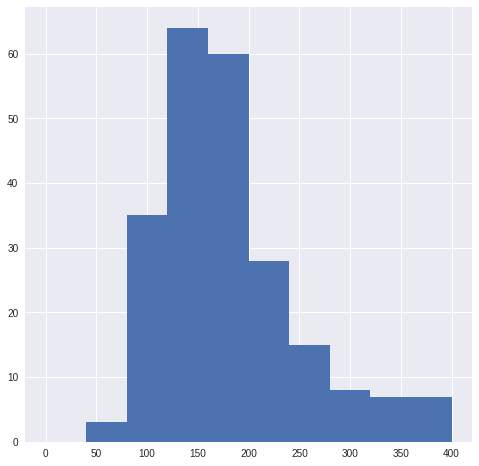

In [18]:
plt.hist(suspect[suspect['ENERGY STAR Score'] == 1.0]['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), range = (0, 400));

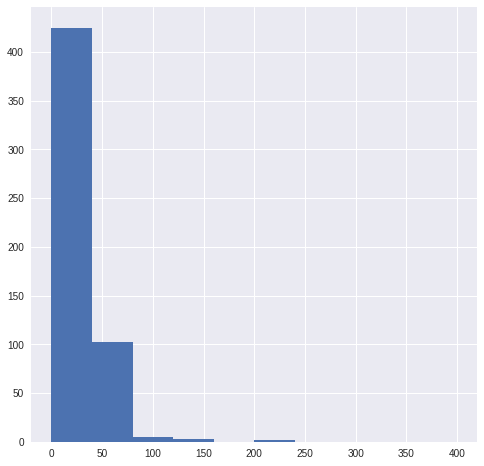

In [19]:
plt.hist(suspect[suspect['ENERGY STAR Score'] == 100.0]['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), range = (0, 400));

It does look like buildings with Energy Star Scores of 100 have lower Site EUI than buildings with Energy Star Scores of 1. 

# Exploratory Plots

### Energy Star by Building Type

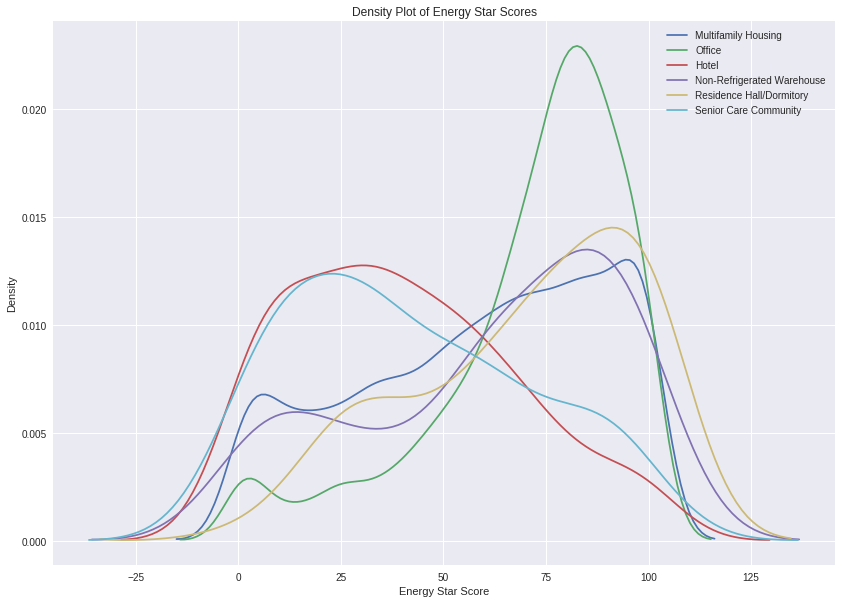

In [20]:
# Create a list of buildings with more than 80 measurements
types = data.dropna(subset=['ENERGY STAR Score'])
types = types['Primary Property Type - Self Selected'].value_counts()
types = list(types[types.values > 80].index)

figsize(14, 10)

# Plot each building
for b_type in types:
    # Select the building type
    subset = data[data['Primary Property Type - Self Selected'] == b_type]
    
    # Density plot of Energy Star scores
    sns.kdeplot(subset['ENERGY STAR Score'].dropna(),
               label = b_type);
    
plt.xlabel('Energy Star Score'); plt.ylabel('Density'); 
plt.title('Density Plot of Energy Star Scores');

### Site EUI by Building Type

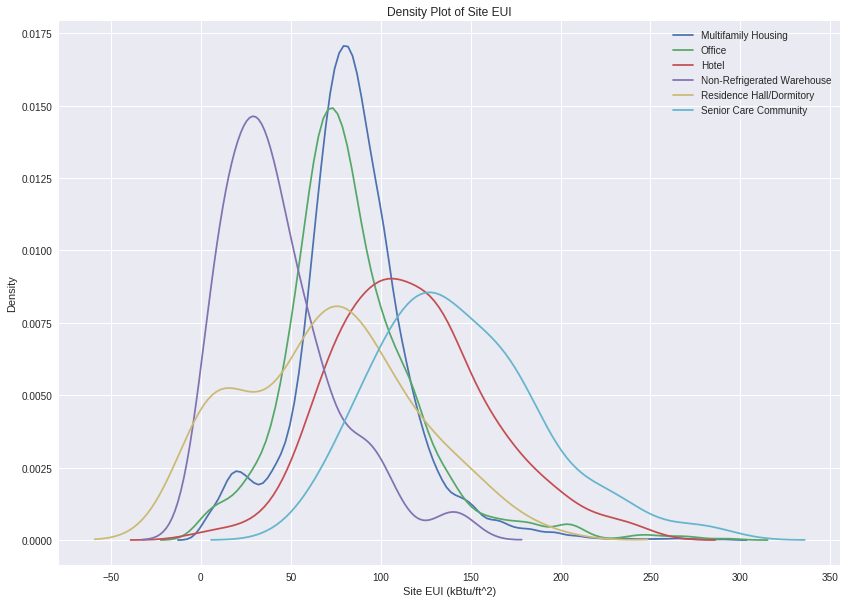

In [21]:
figsize(14, 10)

# Plot the site EUI density plot for each building type
for b_type in types:
    # Remove outliers before plotting
    subset = data[(data['Weather Normalized Site EUI (kBtu/ft²)'] < 300) & 
                     (data['Primary Property Type - Self Selected'] == b_type)]
    
    # Plot the site EUI on a density plot
    sns.kdeplot(subset['Weather Normalized Site EUI (kBtu/ft²)'].dropna(), 
                label = b_type);
    
plt.xlabel('Site EUI (kBtu/ft^2)'); plt.ylabel('Density'); 
plt.title('Density Plot of Site EUI');

### Energy Star Score vs Site EUI

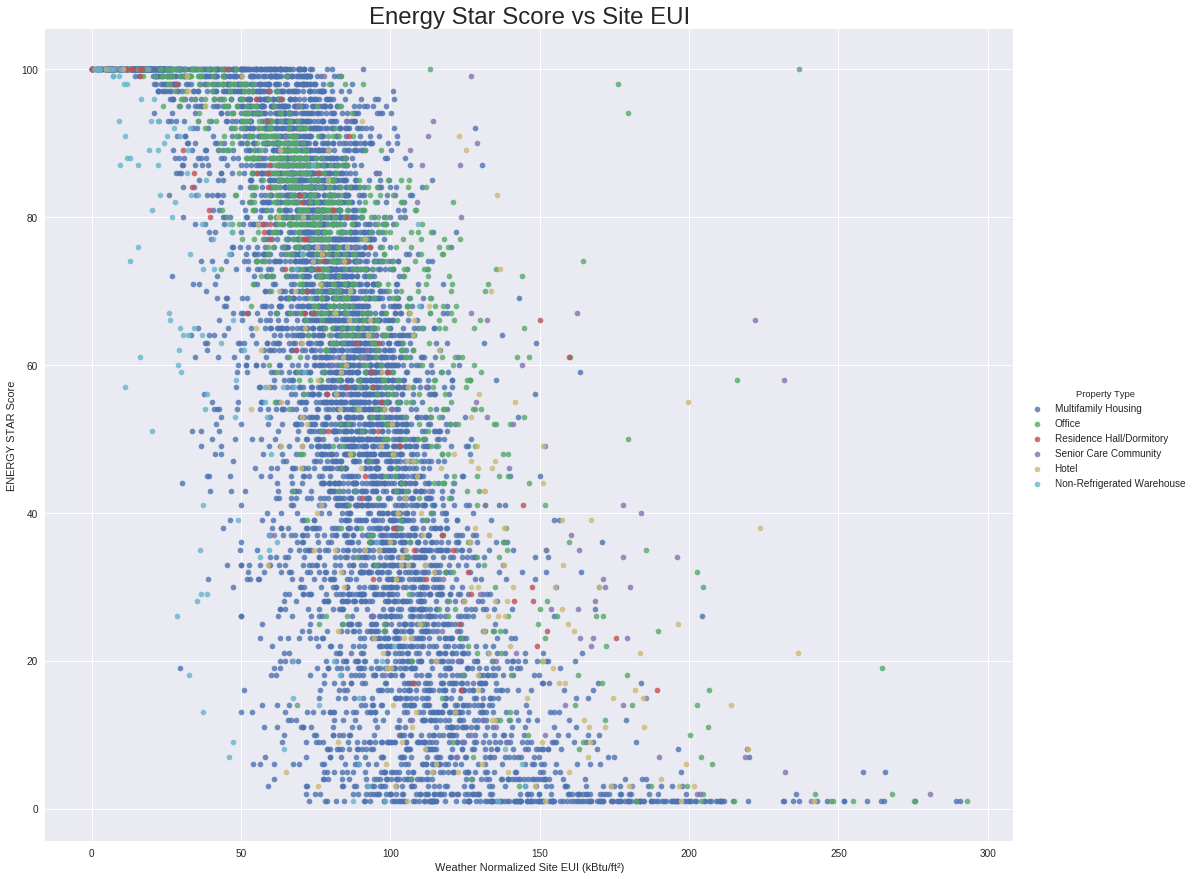

In [22]:
figsize(14, 10)

# Subset to the buildings with most measurements and remove outliers
subset = data[(data['Weather Normalized Site EUI (kBtu/ft²)'] < 300) & 
             (data['Primary Property Type - Self Selected'].isin(types))]

# Drop the buildings without a value
subset = subset.dropna(subset=['ENERGY STAR Score', 
                               'Weather Normalized Site EUI (kBtu/ft²)'])

subset = subset.rename(columns={'Primary Property Type - Self Selected': 'Property Type'})


# Linear Plot of Energy Star Score vs EUI
sns.lmplot('Weather Normalized Site EUI (kBtu/ft²)', 'ENERGY STAR Score', 
           data = subset, hue = 'Property Type', 
           scatter_kws={'alpha': 0.8, 's': 32}, fit_reg=False, 
           size = 12, aspect = 1.2);

plt.title('Energy Star Score vs Site EUI', size = 24);

# Correlations with Energy Star Score

In [0]:
# List of Variables to find correlation coefficients
features = ['Primary Property Type - Self Selected',
            'Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Site Electricity Intensity (kWh/ft²)',
             'Largest Property Use Type - Gross Floor Area (ft²)',
            'Natural Gas Use (kBtu)',
            'ENERGY STAR Score']

subset = data[features].dropna()
subset = subset[subset['Primary Property Type - Self Selected'].isin(types)]

# Rename the columns
subset.columns = ['Property Type', 'Site EUI', 
                  'Electricity Intensity', 'Floor Area',
                  'Natural Gas', 'Energy Star Score']

# Remove outliers
subset = subset[subset['Site EUI'] < 300]

In [24]:
# Group by the building type and calculate correlations
corrs = pd.DataFrame(subset.groupby('Property Type').corr())
corrs = pd.DataFrame(corrs['Energy Star Score'])

# Format the dataframe for display
corrs = corrs.reset_index()
corrs.columns = ['Property Type', 'Variable', 'Correlation with Score']
corrs = corrs[corrs['Variable'] != 'Energy Star Score']
corrs

,Property Type,Variable,Correlation with Score
0,Hotel,Electricity Intensity,-0.553256
2,Hotel,Floor Area,0.042204
3,Hotel,Natural Gas,-0.097727
4,Hotel,Site EUI,-0.598284
5,Multifamily Housing,Electricity Intensity,-0.602274
7,Multifamily Housing,Floor Area,-0.007159
8,Multifamily Housing,Natural Gas,-0.168528
9,Multifamily Housing,Site EUI,-0.743034
10,Non-Refrigerated Warehouse,Electricity Intensity,-0.719545
12,Non-Refrigerated Warehouse,Floor Area,0.125143


# Remove Collinear Variables

In order to find independent variables which can be used to predict the Energy Star Score, we will want to remove varialbes that are highly collinear. For example, the Site EUI and Source EUI are collinear because they both measure a very similar metric, and including both in the model will not give us independent predictors. One quick way to remove collinear variables is by calculating the correlation coefficient between every column and remove those columns with a correlation greater than a certain threshold. 

In [0]:
def corr_df(x, corr_val):
    '''
    Obj: Drops features that are strongly correlated to other features.
          This lowers model complexity, and aids in generalizing the model.
    Inputs:
          df: features df (x)
          corr_val: Columns are dropped relative to the corr_val input (e.g. 0.8)
    Output: df that only includes uncorrelated features
    '''
    # Dont want to remove correlations between Energy Star Score
    y = x['ENERGY STAR Score']
    x = x.drop(columns = ['ENERGY STAR Score'])
    
    # Creates Correlation Matrix and Instantiates
    corr_matrix = x.corr()
    iters = range(len(corr_matrix.columns) - 1)
    drop_cols = []

    # Iterates through Correlation Matrix Table to find correlated columns
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = abs(item.values)
            if val >= corr_val:
                # Prints the correlated feature set and the corr val
                print(col.values[0], "|", row.values[0], "|", round(val[0][0], 2))
                drop_cols.append(col.values[0])

    drops = set(drop_cols)
    x = x.drop(columns = drops)
    x = x.drop(columns = ['Site EUI (kBtu/ft²)'])
    x['ENERGY STAR Score'] = y
               
    return x

In [26]:
data.shape

(11746, 60)

In [27]:
new_data = corr_df(data, corr_val = 0.5)

Weather Normalized Site Natural Gas Intensity (therms/ft²) | Site EUI (kBtu/ft²) | 0.98
Weather Normalized Site Natural Gas Intensity (therms/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 0.98
Weather Normalized Source EUI (kBtu/ft²) | Site EUI (kBtu/ft²) | 1.0
Weather Normalized Source EUI (kBtu/ft²) | Weather Normalized Site EUI (kBtu/ft²) | 1.0
Fuel Oil #1 Use (kBtu) | 2nd Largest Property Use - Gross Floor Area (ft²) | 1.0
Fuel Oil #1 Use (kBtu) | Occupancy | 0.56
Fuel Oil #1 Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.95
Fuel Oil #1 Use (kBtu) | Weather Normalized Site Natural Gas Intensity (therms/ft²) | 0.7
Diesel #2 Use (kBtu) | Order | 0.5
Diesel #2 Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.86
Diesel #2 Use (kBtu) | Weather Normalized Source EUI (kBtu/ft²) | 0.61
Diesel #2 Use (kBtu) | Fuel Oil #2 Use (kBtu) | 1.0
District Steam Use (kBtu) | Site EUI (kBtu/ft²) | 0.54
District Steam Use (kBtu) | Weather Normalized Site EUI (kBtu/ft²) | 0.54
District

In [28]:
new_data.shape

(11746, 42)

Now we have removed the highly collinear variables. We can try adding in log transformations of the features to see if that imrpoves the correlations.

### Add in Log Transformations of Variables

In [29]:
log_data = new_data.copy()

for col in new_data.select_dtypes('number').columns:
    log_data['log_%s' % col] = np.log10(new_data[col])
    
log_data = log_data.replace({-np.inf: np.nan})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


In [0]:
for col in log_data.select_dtypes('number').columns:
    if np.any(np.isinf(log_data[col])):
        print(col)

In [31]:
log_data.corr()['ENERGY STAR Score'].sort_values()

log_Weather Normalized Site EUI (kBtu/ft²)                    -0.592217
log_Weather Normalized Site Electricity Intensity (kWh/ft²)   -0.439732
log_Fuel Oil #5 & 6 Use (kBtu)                                -0.264992
log_Natural Gas Use (kBtu)                                    -0.238199
log_Fuel Oil #4 Use (kBtu)                                    -0.234198
Fuel Oil #4 Use (kBtu)                                        -0.217676
Fuel Oil #5 & 6 Use (kBtu)                                    -0.192863
Fuel Oil #2 Use (kBtu)                                        -0.144715
log_Water Use (All Water Sources) (kgal)                      -0.128922
log_Fuel Oil #2 Use (kBtu)                                    -0.119845
Year Built                                                    -0.118181
log_Year Built                                                -0.117360
Weather Normalized Site Electricity Intensity (kWh/ft²)       -0.067762
log_Property Id                                               -0

The log transformed variables have a greater absolute magnitude correlation with the target. This means they might be of use in a linear regression model. We can compare performance with and without these variables.

# Prepare Training and Testing Sets for Regression

In [0]:
def train_test_reg(df):

    
    X = df.select_dtypes('number')
    
    X['Largest Property Use Type'] = df['Largest Property Use Type']
    X['Metered Areas (Energy)'] = df['Metered Areas (Energy)']
    X['DOF Benchmarking Submission Status'] = df['DOF Benchmarking Submission Status']
    
    X = pd.get_dummies(X)
    
    missing_scores = X[X['ENERGY STAR Score'].isnull()]
    
    X = X.dropna(subset = ['ENERGY STAR Score'])
    
    y = X['ENERGY STAR Score']
    if 'log_ENERGY STAR Score' in list(X.columns):
        X = X.drop(columns=['log_Longitude', 'log_ENERGY STAR Score', 'log_Property Id'])
        missing_scores = missing_scores.drop(columns = ['log_Longitude', 'log_ENERGY STAR Score', 'log_Property Id'])
        
    X = X.drop(columns = ['Property Id', 'ENERGY STAR Score', 'Longitude'])
    missing_scores = missing_scores.drop(columns = ['Property Id', 'ENERGY STAR Score', 'Longitude'])
    feature_names = list(X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    imputer = Imputer(missing_values = 'NaN', strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    missing_scores = imputer.transform(missing_scores)
    
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [0]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)

# Regression on Energy Star Scores

We will evalute our regression predictions using mean absolute error. This is simply the average error in absolute value of our predictions from the actual value and has the advantage of being easily explainable.

First we should establish a baseline measure to beat. We can use the average Energy Star Score as a baseline by predicting the mean absolute error if we simply guess the average Energy Star Score in the training date for every observation in the testing data.

In [34]:
reg_baseline = np.mean(y_train)
reg_mae = np.mean(abs(reg_baseline - y_test))

print('Baseline Mean Absolute Error: {:0.4f}.'.format(reg_mae))

Baseline Mean Absolute Error: 25.4868.


If our model cannot achieve lower than this score, then perhaps a regression approach will not work for this problem. First, let's see if a simple linear regression will work for this problem. 

#### Linear Regression without Log Transformed Variables

In [35]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = np.mean(abs(lin_reg_pred - y_test))
print('Linear Regression Mean Absolute Error: {:0.4f}.'.format(lin_reg_mse))

Linear Regression Mean Absolute Error: 24.1479.


#### Linear Regression with Log Transformed Variables

In [36]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(log_data)

lin_reg.fit(X_train, y_train)

lin_reg_pred = lin_reg.predict(X_test)
lin_reg_mse = np.mean(abs(lin_reg_pred - y_test))
print('Linear Regression Mean Absolute Error: {:0.4f}.'.format(lin_reg_mse))

Linear Regression Mean Absolute Error: 17.1994.


The linear regression does not perform much better than the baseline although the log transformed features do reduce the error. Even though this is better than the baseline, let's implement a random forest regression and check the error. 

## Random Forest Regression

#### Random Forest with Log Transformed Variables

In [37]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

rf_reg_mse = np.mean(abs(rf_reg_pred - y_test))
print('Random Forest Regresion Mean Absolute Error: {:0.4f}.'.format(rf_reg_mse))

Random Forest Regresion Mean Absolute Error: 10.2418.


#### Random Forest without Log Transformed Variables

In [0]:
X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_reg(new_data)

In [39]:
rf_reg = RandomForestRegressor(n_estimators=200)
rf_reg.fit(X_train, y_train)

rf_reg_pred = rf_reg.predict(X_test)

rf_reg_mse = np.mean(abs(rf_reg_pred - y_test))
print('Random Forest Regresion Mean Absolute Error: {:0.4f}.'.format(rf_reg_mse))

Random Forest Regresion Mean Absolute Error: 10.4055.


These scores are much better and indicate that machine learning may indeed be appropriate for this problem. However, what we gain in accuracy with a more complex model, we lose in interpretability. The random forest predictions are much harder to explain than those from a linear regression. We will use the non-log transformed variables to reduce the number of features in our model. 

## Interpret Results

The most we can do with the random forest is show the relative feature importances. The absolute value of these numbers is not as important as the relative comparisons. We can use these to see which features (variables) the random forest finds most useful for predicting the Energy Star Score.

In [0]:
def interpret_features(feature_list, importances):
    feature_df = pd.DataFrame({'feature': feature_list, 'importance': importances}).sort_values('importance', ascending = False)
    figsize(8, 8)
    plt.bar(feature_df[feature_df['importance'] > 0.01]['feature'], feature_df[feature_df['importance'] > 0.01]['importance'])
    plt.xticks(rotation = 90)
    plt.xlabel('feature'); plt.ylabel('importance'); plt.title('Top Feature Importances')
    plt.show();
    
    return feature_df

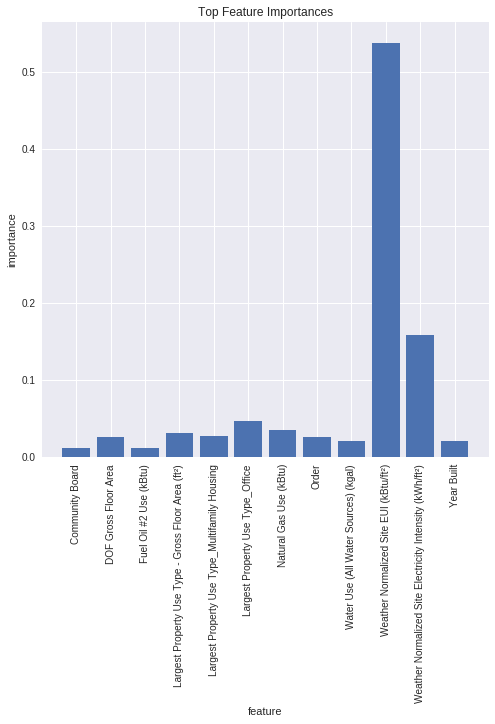

In [41]:
feature_df = interpret_features(feature_names, rf_reg.feature_importances_)

In [42]:
feature_df.head(10)

,feature,importance
8,Weather Normalized Site EUI (kBtu/ft²),0.537270
9,Weather Normalized Site Electricity Intensity ...,0.158616
40,Largest Property Use Type_Office,0.046771
13,Natural Gas Use (kBtu),0.035696
2,Largest Property Use Type - Gross Floor Area (...,0.031801
37,Largest Property Use Type_Multifamily Housing,0.027264
1,DOF Gross Floor Area,0.026024
0,Order,0.025916
5,Year Built,0.021407
14,Water Use (All Water Sources) (kgal),0.020250


The most important variables to use when predicting the Energy Star Score are Site EUI, Weather Normalized Site Electricity Intensity, and the Largest Property Use Type.

In [43]:
# List of Features to Plot
features = ['Weather Normalized Site EUI (kBtu/ft²)',
            'Weather Normalized Site Electricity Intensity (kWh/ft²)',
             'Largest Property Use Type - Gross Floor Area (ft²)',
             'Natural Gas Use (kBtu)',
             'ENERGY STAR Score']

subset = new_data[features].dropna()

# Rename the columns
subset.columns = ['Site EUI', 'Electricity Intensity', 
                  'Floor Area', 'Natural Gas', 'Score']

# Remove outliers and problem values
subset = subset[subset['Site EUI'] < 300]

# Log Transforms
subset['log Site EUI'] = np.log(subset['Site EUI'])
subset['log Electricity Intensity'] = np.log(subset['Electricity Intensity'])
subset['log Floor Area'] = np.log(subset['Floor Area'])
subset['log Natural Gas'] = np.log(subset['Natural Gas'])

subset = subset.replace({-np.inf: np.nan})

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: divide by zero encountered in log


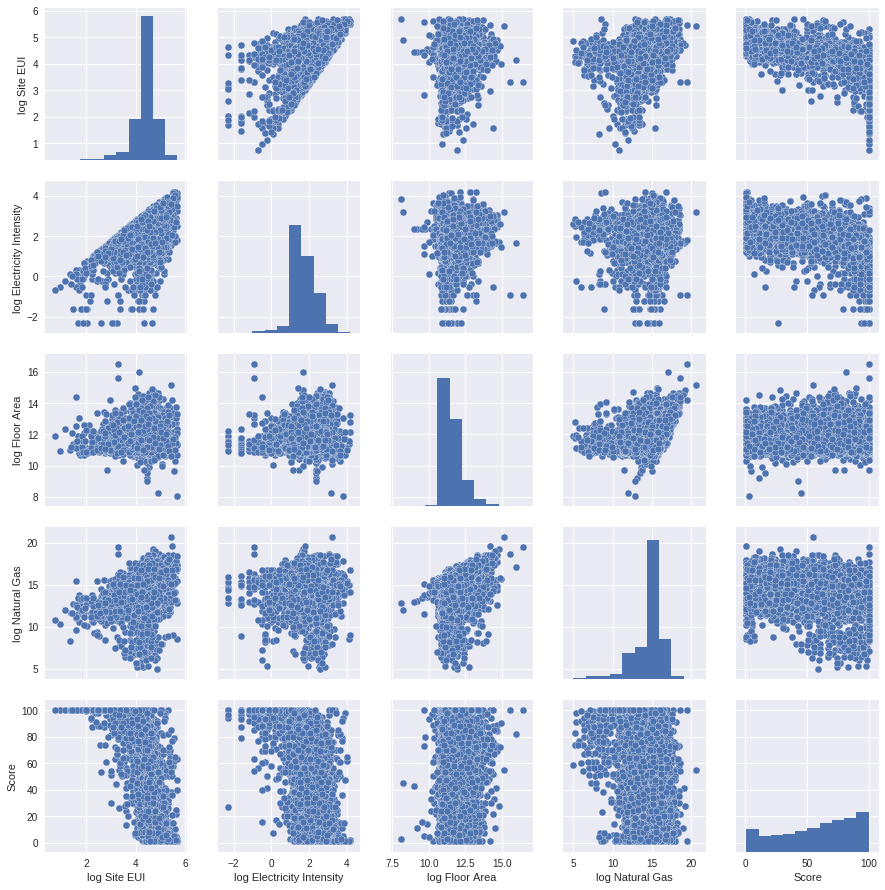

In [44]:
sns.pairplot(subset.dropna()[['log Site EUI', 'log Electricity Intensity', 
                              'log Floor Area', 'log Natural Gas', 'Score']]);

### Energy Star Score by Building Type

In [45]:
data.dropna(subset = ['ENERGY STAR Score']).groupby('Largest Property Use Type')['ENERGY STAR Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Largest Property Use Type,,,,,,,,
Bank Branch,2.0,24.000000,29.698485,3.0,13.50,24.0,34.50,45.0
Courthouse,2.0,94.000000,8.485281,88.0,91.00,94.0,97.00,100.0
Distribution Center,62.0,52.435484,29.481098,1.0,29.25,53.0,78.75,100.0
Financial Office,15.0,60.133333,33.985011,1.0,48.50,69.0,82.00,95.0
Hospital (General Medical & Surgical),41.0,59.634146,34.897533,1.0,28.00,58.0,100.00,100.0
Hotel,215.0,39.488372,27.233477,1.0,17.00,35.0,57.50,100.0
K-12 School,98.0,57.183673,32.486745,1.0,30.25,62.5,86.25,100.0
Medical Office,29.0,52.586207,31.960374,1.0,33.00,59.0,78.00,100.0
Multifamily Housing,7529.0,58.736220,30.222005,1.0,35.00,63.0,85.00,100.0


### Distribution of Predicted Values

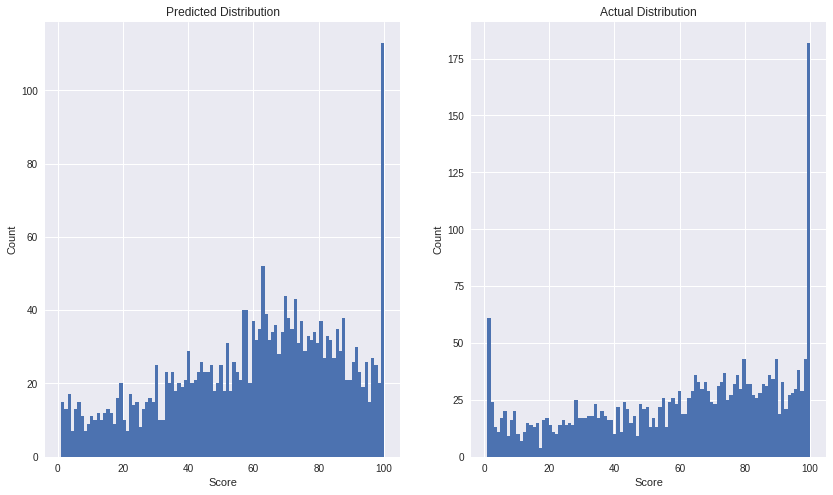

In [46]:
figsize(14, 8)

# Plot predictions
ax = plt.subplot(121)
ax.hist(rf_reg_pred, bins = 100)
ax.set_xlabel('Score'); ax.set_ylabel('Count'); 
ax.set_title('Predicted Distribution')

# Plot true values
ax2 = plt.subplot(122)
ax2.hist(y_test, bins = 100)
ax2.set_xlabel('Score'); ax2.set_ylabel('Count'); 
ax2.set_title('Actual Distribution');

### Predictions for Buildings with Missing Scores

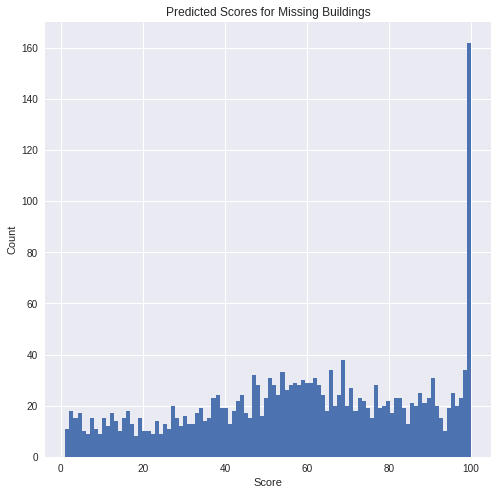

In [47]:
# Predict for the buildings missing energy star scores
missing_preds = rf_reg.predict(missing_scores)

figsize(8, 8)

# Distribution of predicted scores
plt.hist(missing_preds, bins = 100);
plt.xlabel('Score'); plt.ylabel('Count'); 
plt.title('Predicted Scores for Missing Buildings');

# Classification

As an alternative method, we can try to classify the buildings into groups based on their Energy Star Score. For ease of interpretabilty, we will assign the buildings a grade based on binning the scores into intervals of 20. 

In [0]:
def train_test_clf(df):

    X = df.select_dtypes('number')

    X['Largest Property Use Type'] = df['Largest Property Use Type']
    X['Metered Areas (Energy)'] = df['Metered Areas (Energy)']
    X['DOF Benchmarking Submission Status'] = df['DOF Benchmarking Submission Status']
    
    X = pd.get_dummies(X)
    
    missing_scores = X[X['ENERGY STAR Score'].isnull()]
    X = X.dropna(subset = ['ENERGY STAR Score'])
    
    X['grade'] = pd.cut(X['ENERGY STAR Score'], bins = range(0, 101, 20), labels = ['F', 'D', 'C', 'B', 'A'])
    
    y = X['grade']
    X = X.drop(columns = ['Order', 'Property Id', 'ENERGY STAR Score', 'grade'])
    missing_scores = missing_scores.drop(columns = ['Order', 'Property Id', 'ENERGY STAR Score'])
    feature_names = list(X.columns)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    
    imputer = Imputer(strategy = 'median')
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.transform(X_test)
    missing_scores = imputer.transform(missing_scores)
    
    return X_train, X_test, y_train, y_test, missing_scores, feature_names

In [0]:
 X_train, X_test, y_train, y_test, missing_scores, feature_names = train_test_clf(new_data)

In [50]:
y_train_series = pd.Series(y_train)
y_train_series.value_counts()

A    2275
B    1682
C    1239
F    1078
D     957
Name: grade, dtype: int64

### Random Forest Classification

In [0]:
rf_clf = RandomForestClassifier(n_estimators=200)
rf_clf.fit(X_train, y_train)

rf_clf_pred = rf_clf.predict(X_test)

### Interpret Classification Model Results

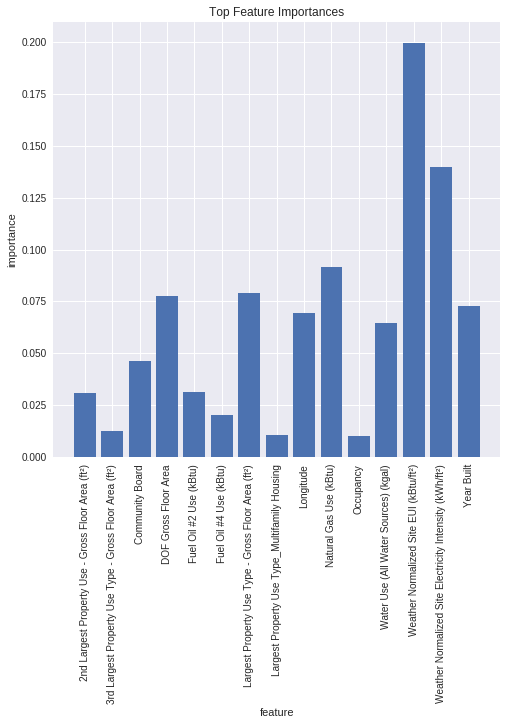

In [52]:
features = interpret_features(feature_names, rf_clf.feature_importances_)

In [53]:
features.head(10)

,feature,importance
7,Weather Normalized Site EUI (kBtu/ft²),0.199599
8,Weather Normalized Site Electricity Intensity ...,0.139855
12,Natural Gas Use (kBtu),0.091424
1,Largest Property Use Type - Gross Floor Area (...,0.079141
0,DOF Gross Floor Area,0.077566
4,Year Built,0.072827
14,Longitude,0.069477
13,Water Use (All Water Sources) (kgal),0.064673
15,Community Board,0.046509
9,Fuel Oil #2 Use (kBtu),0.031378


### Classification Metrics

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 22)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center", size = 18,
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.xticks(size = 18)
    plt.yticks(size = 18)
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)

In [0]:
def evaluate_classifications(true, predictions):
    accuracy = np.mean(true == predictions)
    f1_value = f1_score(true, predictions, average='weighted')
    cm = confusion_matrix(true, predictions)
    
    print('Accuracy: {:0.2f}.'.format(accuracy))
    print('F1 score: {:0.2f}.'.format(f1_value))
    
    plot_confusion_matrix(cm, classes = sorted(set(true)))

Accuracy: 0.59.
F1 score: 0.60.


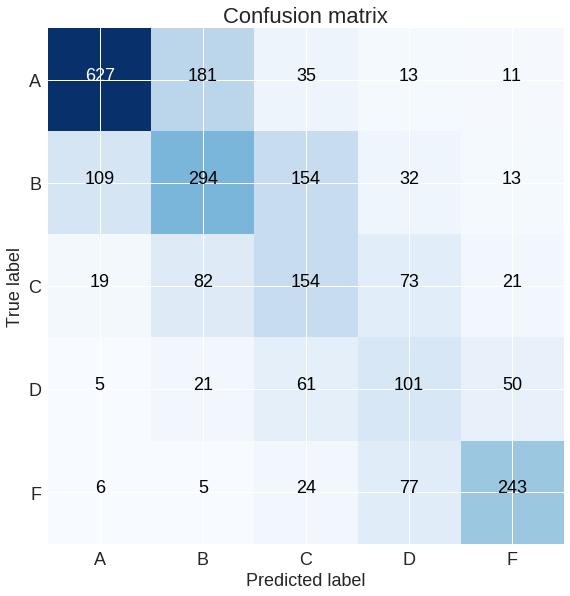

In [56]:
evaluate_classifications(rf_clf_pred, y_test)

In [57]:
missing_classes = rf_clf.predict(missing_scores)

pd.Series(missing_classes).value_counts()

A    899
F    466
B    347
C    245
D    147
dtype: int64

# Conclusions

* Energy Star Score might not be the most accurate measure of a buildings overall energy efficiency
* Disproportionate number of buildings have either 1 or 100 energy star scores
* Site EUI is more normally distributed and might be a more objective measure
* Regression and Classification both are able to produce reasonable predictions for Energy Star Score
* The most useful random forest features for predicting Energy Star Score are EUI, Gross Floor Area, and electricty usage

In [0]:
data.to_csv('cleaned_data.csv', index = False)